#### Goal of the Competition ####

The goal of this competition is to predict monthly microbusiness density in a given area by developing an accurate model trained on U.S. 
county-level data. https://www.kaggle.com/competitions/godaddy-microbusiness-density-forecasting/data

In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

In [61]:
#load the dataset
test_df = pd.read_csv("test.csv")
train_df = pd.read_csv("train.csv")
census_df = pd.read_csv("census_starter.csv")


In [62]:
# train data has 122265 rows and 8 columns
train_df.shape

(122265, 7)

In [63]:
# test data has 25080,rows and 3 columns
test_df.shape

(25080, 3)

In [64]:
census_df.shape

(3142, 26)

### Explatory Data Anaylsis ###

In [65]:
# Perform initial exploration
# we can see the name of the columns as below. row_id is assinged to each individual rows. 
# we have 39  unique value of first_day_of_month column. It means that there are 39 month 
train_df.nunique(axis=0)

row_id                   122265
cfips                      3135
county                     1871
state                        51
first_day_of_month           39
microbusiness_density     97122
active                    19193
dtype: int64

In [66]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122265 entries, 0 to 122264
Data columns (total 7 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   row_id                 122265 non-null  object 
 1   cfips                  122265 non-null  int64  
 2   county                 122265 non-null  object 
 3   state                  122265 non-null  object 
 4   first_day_of_month     122265 non-null  object 
 5   microbusiness_density  122265 non-null  float64
 6   active                 122265 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 6.5+ MB


In [67]:
train_df.head()

,row_id,cfips,county,state,first_day_of_month,microbusiness_density,active
0,1001_2019-08-01,1001,Autauga County,Alabama,2019-08-01,3.007682,1249
1,1001_2019-09-01,1001,Autauga County,Alabama,2019-09-01,2.884870,1198
2,1001_2019-10-01,1001,Autauga County,Alabama,2019-10-01,3.055843,1269
3,1001_2019-11-01,1001,Autauga County,Alabama,2019-11-01,2.993233,1243
4,1001_2019-12-01,1001,Autauga County,Alabama,2019-12-01,2.993233,1243


In [68]:
print(train_df[50:80])

             row_id  cfips          county    state first_day_of_month  \
50  1003_2020-07-01   1003  Baldwin County  Alabama         2020-07-01   
51  1003_2020-08-01   1003  Baldwin County  Alabama         2020-08-01   
52  1003_2020-09-01   1003  Baldwin County  Alabama         2020-09-01   
53  1003_2020-10-01   1003  Baldwin County  Alabama         2020-10-01   
54  1003_2020-11-01   1003  Baldwin County  Alabama         2020-11-01   
55  1003_2020-12-01   1003  Baldwin County  Alabama         2020-12-01   
56  1003_2021-01-01   1003  Baldwin County  Alabama         2021-01-01   
57  1003_2021-02-01   1003  Baldwin County  Alabama         2021-02-01   
58  1003_2021-03-01   1003  Baldwin County  Alabama         2021-03-01   
59  1003_2021-04-01   1003  Baldwin County  Alabama         2021-04-01   
60  1003_2021-05-01   1003  Baldwin County  Alabama         2021-05-01   
61  1003_2021-06-01   1003  Baldwin County  Alabama         2021-06-01   
62  1003_2021-07-01   1003  Baldwin Co

In [69]:
train_df.tail()

,row_id,cfips,county,state,first_day_of_month,microbusiness_density,active
122260,56045_2022-06-01,56045,Weston County,Wyoming,2022-06-01,1.803249,101
122261,56045_2022-07-01,56045,Weston County,Wyoming,2022-07-01,1.803249,101
122262,56045_2022-08-01,56045,Weston County,Wyoming,2022-08-01,1.785395,100
122263,56045_2022-09-01,56045,Weston County,Wyoming,2022-09-01,1.785395,100
122264,56045_2022-10-01,56045,Weston County,Wyoming,2022-10-01,1.785395,100


In [70]:
test_df.head()

,row_id,cfips,first_day_of_month
0,1001_2022-11-01,1001,2022-11-01
1,1003_2022-11-01,1003,2022-11-01
2,1005_2022-11-01,1005,2022-11-01
3,1007_2022-11-01,1007,2022-11-01
4,1009_2022-11-01,1009,2022-11-01


In [71]:
train_df.first_day_of_month.describe()

count         122265
unique            39
top       2019-08-01
freq            3135
Name: first_day_of_month, dtype: object

In [72]:
train_df.first_day_of_month.min()

'2019-08-01'

In [73]:
train_df.first_day_of_month.max()

'2022-10-01'

In [74]:
#check for msising values; as we counted the sum of missing value of each column, it is deemded that there is no mssing vlaue in the dataset

print(train_df.isnull().sum())

row_id                   0
cfips                    0
county                   0
state                    0
first_day_of_month       0
microbusiness_density    0
active                   0
dtype: int64


In [75]:
# Summary statistics of microbusiness_density. We can see that the max densitiy is 284 and min density is 3.81
train_df.microbusiness_density.describe()

count    122265.000000
mean          3.817671
std           4.991087
min           0.000000
25%           1.639344
50%           2.586543
75%           4.519231
max         284.340030
Name: microbusiness_density, dtype: float64

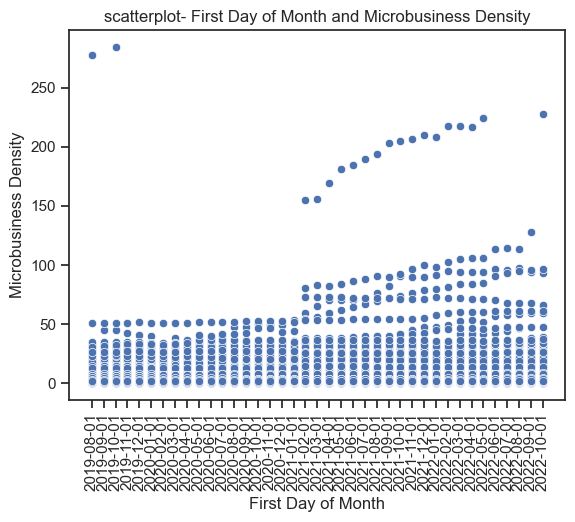

In [76]:
# visualize entire microbusiness density. We can see increasing trend of microbuisness denstiy
sns.scatterplot(data= train_df, x='first_day_of_month', y='microbusiness_density')
plt.title('scatterplot- First Day of Month and Microbusiness Density')
plt.xlabel('First Day of Month')
plt.ylabel('Microbusiness Density')
plt.xticks(rotation='vertical')
plt.show()


In [77]:
#Using the given data, we can also check the trend of micor business at state level. In order to do this, we will average the density based on state. 
grouped_df = train_df.groupby(['state', 'first_day_of_month'])['microbusiness_density'].mean()

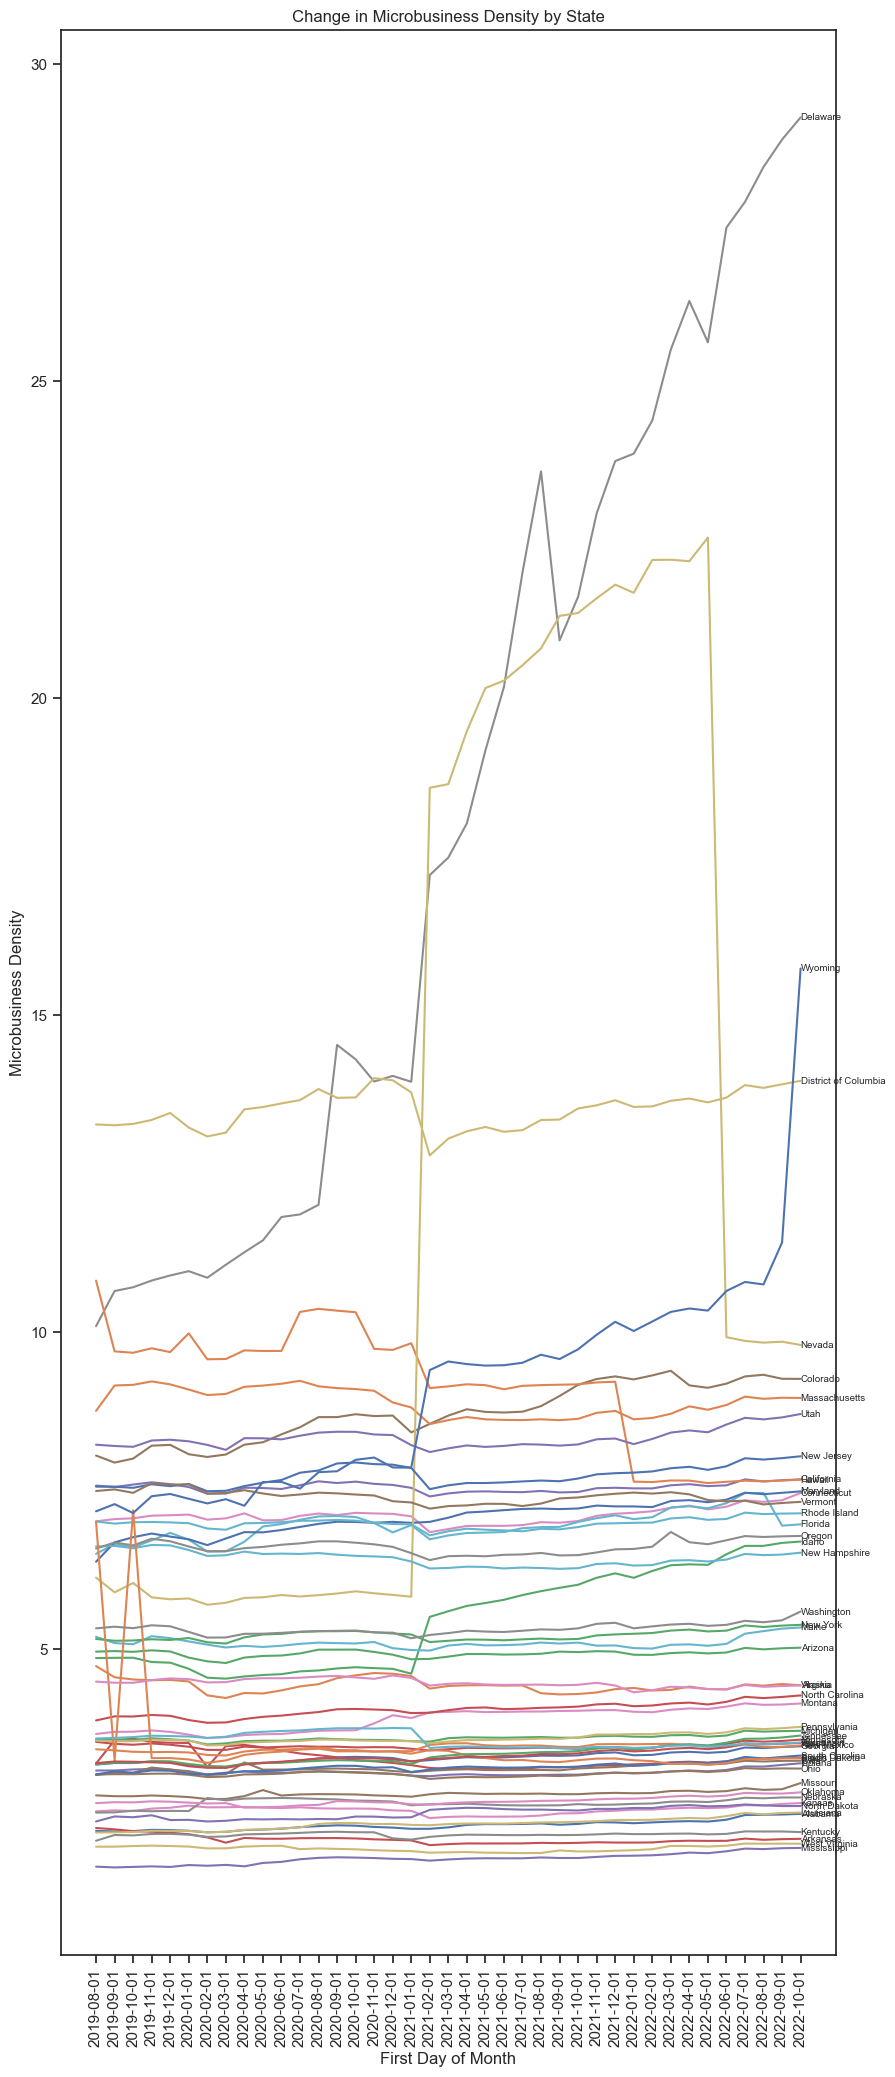

In [78]:
import matplotlib.pyplot as plt

grouped_df = train_df.groupby(['state', 'first_day_of_month'])['microbusiness_density'].mean().reset_index()

# Set the figure size
plt.figure(figsize=(10, 25))

# Iterate over the groups
for state, data in grouped_df.groupby('state'):
    # Plot the data for each state
    plt.plot(data['first_day_of_month'], data['microbusiness_density'], label=state)
    
    # Get the last data point for the state
    x = data['first_day_of_month'].iloc[-1]
    y = data['microbusiness_density'].iloc[-1]
    
    # Add text annotation with the state name
    plt.text(x, y, state, ha='left', va='center', fontsize=7)

# Customize the chart
plt.xlabel('First Day of Month')
plt.ylabel('Microbusiness Density')
plt.title('Change in Microbusiness Density by State')

# Move the legend to the bottom
plt.xticks(rotation='vertical')

# Display the chart
plt.show()


In [80]:
#showing the 15 days of density trend gvien the time frame of data.
grouped_df[grouped_df['state'] == 'Delaware'].head(15)

,state,first_day_of_month,microbusiness_density
273,Delaware,2019-08-01,10.094114
274,Delaware,2019-09-01,10.648283
275,Delaware,2019-10-01,10.707502
276,Delaware,2019-11-01,10.813359
277,Delaware,2019-12-01,10.893850
278,Delaware,2020-01-01,10.961720
279,Delaware,2020-02-01,10.857948
280,Delaware,2020-03-01,11.062690
281,Delaware,2020-04-01,11.260138
282,Delaware,2020-05-01,11.447747


During our exploratory data analysis (EDA), we observed a significant and rapid increase in micro business density in Delaware compared to other states. This finding emerged from our analysis without any prior knowledge or assumptions. To validate this trend, we briefly reviewed some articles on the topic of micro business growth in Delaware. Notably, a recent article from Fox Business highlighted that entrepreneurs are heading to Delaware to leverage the small business opportunities available in the state."

Reference:
Fox Business. (Year, Month Day). Entrepreneurs head to Delaware for small business opportunities. Retrieved from https://www.foxbusiness.com/lifestyle/entrepreneurs-head-delaware-small-business-opportunities

In [ ]:
c